In [14]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

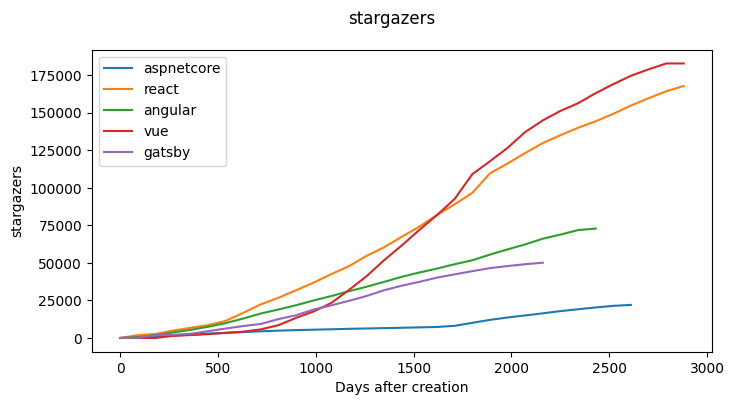

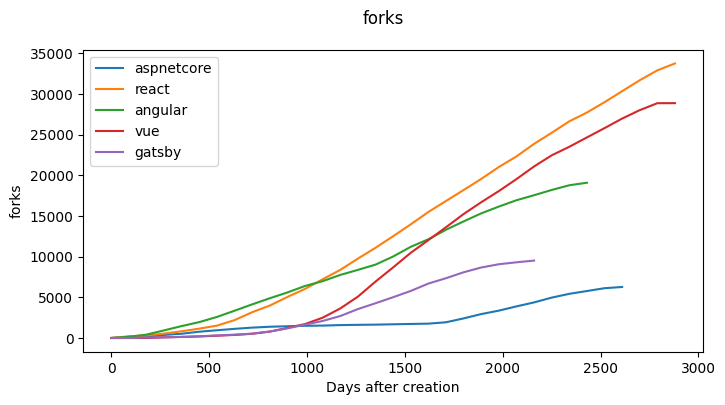

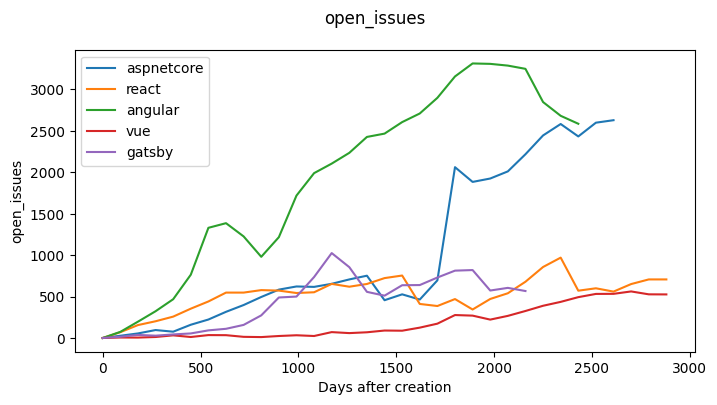

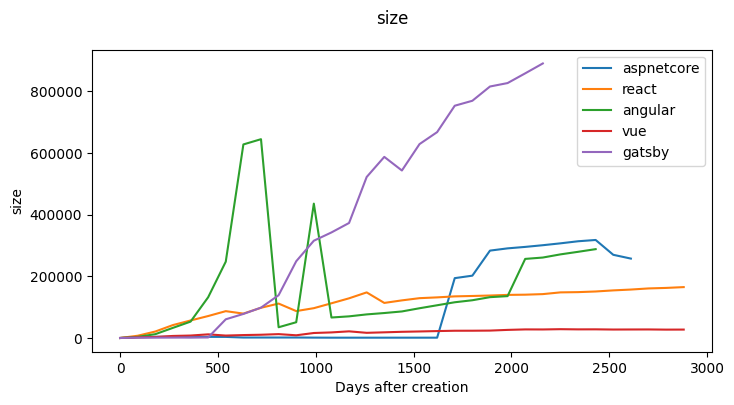

In [15]:
data_directory = '../../data/final'

types = ["stargazers", "forks", "open_issues", "size"]

for type in types:
    fig, ax = plt.subplots(figsize=(8,4), dpi= 100)
    fig.suptitle(type)
    for file_name in os.listdir(data_directory):
        if file_name.endswith(".json"):
            with open(f'{data_directory}/{file_name}') as json_file:                
                name = file_name[:-5]            
                data = json.load(json_file)
                stars = np.array([d[type] for d in data])

                dates = [i * 30*3 for i, star in enumerate(stars)]
                plt.plot(dates, stars, label=name)
    
    joint_metrics_figures_directory = '../../figures/metrics/joint'
    ax.set_ylabel(type)
    ax.set_xlabel("Days after creation")
    plt.legend()
    plt.savefig(f"{joint_metrics_figures_directory}/{type}.png", facecolor='white', transparent=False)
    plt.show()  